# Check Cleaning of Negative Contigs

In [11]:
import pandas as pd

results_dir = '../results/prep'
removed_contigs = pd.read_csv(f'{results_dir}/removed_contigs.csv')
removed_contigs

,Species,Contig,Contig Length,Similarity,Plasmid
0,GCA_000264765.2_ASM26476v2.fasta,CP006665.1,127046,1.000000,NZ_CP006665.1.fasta
1,GCA_000264765.2_ASM26476v2.fasta,CP006666.1,2219,1.000000,NZ_CP006666.1.fasta
2,GCA_000018745.1_ASM1874v1.fasta,CP000889.1,37317,0.905340,NC_002118.1.fasta
3,GCA_000196215.1_ASM19621v1.fasta,CP000014.1,27108,0.987342,NZ_CP028877.1.fasta
4,GCA_000196215.1_ASM19621v1.fasta,CP000015.1,55560,0.917874,NZ_CP028873.1.fasta
...,...,...,...,...,...
178,GCA_000018045.1_ASM1804v1.fasta,CP000823.1,9294,0.957895,CP052529.1.fasta
179,GCA_000019205.1_ASM1920v1.fasta,CP000933.1,46201,1.000000,NC_012040.1.fasta
180,GCA_000146835.1_ASM14683v1.fasta,GL405236.1,28289,0.933099,NZ_CP046318.1.fasta
181,GCA_000013925.2_ASM1392v2.fasta,BX649209.1,174155,1.000000,NC_005916.1.fasta


In [2]:
removed_contigs['Similarity'].value_counts()  # 129 times similarity of exact 1.0

1.000000    129
0.920000      2
0.944444      2
0.975610      2
0.904762      2
0.947368      2
0.985646      1
0.929789      1
0.997575      1
0.924370      1
0.936585      1
0.987624      1
0.951220      1
0.930556      1
0.978022      1
0.993243      1
0.903166      1
0.953488      1
0.900000      1
0.932320      1
0.935484      1
0.932886      1
0.998672      1
0.939394      1
0.957895      1
0.903226      1
0.909091      1
0.997085      1
0.988036      1
0.987342      1
0.917874      1
0.973251      1
0.976190      1
0.972603      1
0.963415      1
0.960000      1
0.997468      1
0.944974      1
0.955882      1
0.905340      1
0.945946      1
0.996334      1
0.965258      1
0.960983      1
0.918593      1
0.989474      1
0.989464      1
0.994609      1
0.977778      1
0.933099      1
Name: Similarity, dtype: int64

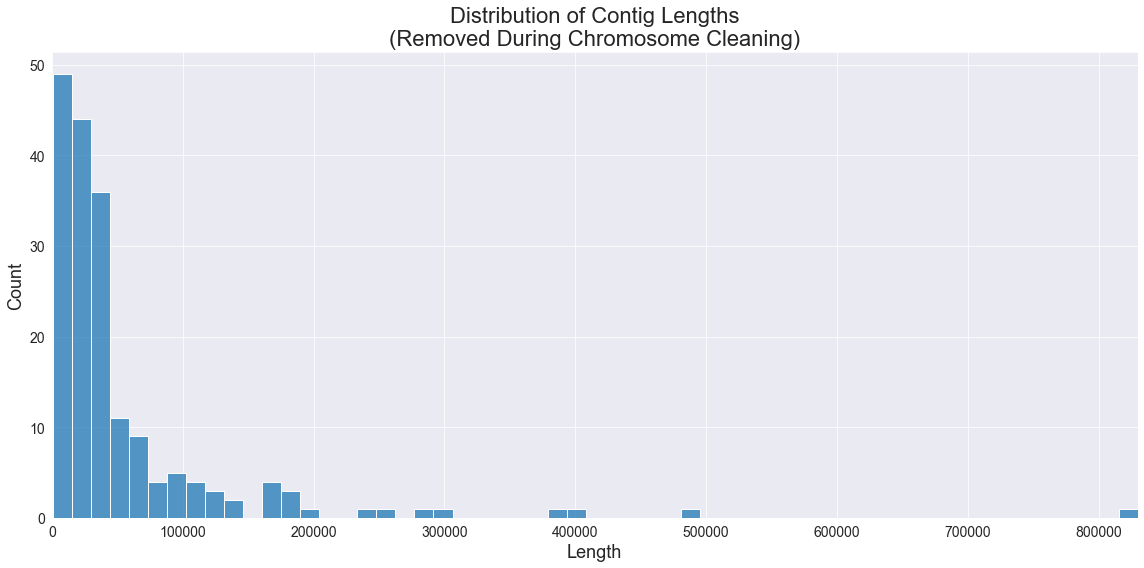

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot length distribution of removed negative contigs
_, ax = plt.subplots(figsize=(16, 8))
sns.histplot(removed_contigs, x='Contig Length', ax=ax)
plt.title('Distribution of Contig Lengths\n(Removed During Chromosome Cleaning)', fontsize=22)
plt.xlim((0, max(removed_contigs['Contig Length'])))
plt.xlabel('Length', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('../plots/check_prep/removed_neg_contig_lengths.png', dpi=300, facecolor='white', edgecolor='none')

In [12]:
from Bio import SeqIO

ref_neg_dir = '../data/simulation/ref_neg'
megaplasmids = pd.read_csv(f'{results_dir}/megaplasmid_lengths.csv')['Plasmid'].tolist()

def get_species_length(ref_neg_dir, species):
    species_len = 0
    with open(f'{ref_neg_dir}/{species}', 'r') as f:
        for contig in SeqIO.parse(f, 'fasta'):
            species_len += len(contig.seq)
    return species_len

def get_plasmids(removed_contigs, species):
    return list(set(removed_contigs[removed_contigs['Species'] == species]['Plasmid']))

def get_megaplasmids(megaplasmids, plasmids):
    return list(set(plasmids).intersection(megaplasmids))

# aggregate metrics per species
cleaned_species = removed_contigs.groupby('Species')['Contig Length'].sum().reset_index()
cleaned_species['Species Length'] = cleaned_species['Species'].apply(lambda s: get_species_length(ref_neg_dir, s))
cleaned_species['Cleaned Percentage'] = cleaned_species['Contig Length'] * 100 / cleaned_species['Species Length']
cleaned_species['Plasmids'] = cleaned_species['Species'].apply(lambda s: get_plasmids(removed_contigs, s))
cleaned_species['Megaplasmids'] = cleaned_species['Plasmids'].apply(lambda p: get_megaplasmids(megaplasmids, p))
cleaned_species

,Species,Contig Length,Species Length,Cleaned Percentage,Plasmids,Megaplasmids
0,GCA_000006605.1_ASM660v1.fasta,14323,2476822,0.578281,[NC_003080.1.fasta],[]
1,GCA_000008505.1_ASM850v1.fasta,77112,5314794,1.450893,[NZ_CP010087.1.fasta],[]
2,GCA_000008925.1_ASM892v1.fasta,306866,2133977,14.380005,"[NC_006529.1.fasta, NC_006530.1.fasta, NC_0079...",[]
3,GCA_000009805.1_ASM980v1.fasta,271119,6292344,4.308712,"[NC_006363.1.fasta, NC_006362.1.fasta]",[]
4,GCA_000009865.1_ASM986v1.fasta,12846,2697861,0.476155,"[NC_007171.1.fasta, NZ_CP029648.1.fasta, NC_00...",[]
...,...,...,...,...,...,...
74,GCA_000463315.1_B_cell_WH2_1.0.fasta,6899,7082128,0.097414,"[NZ_CP041232.1.fasta, NZ_CP045616.1.fasta]",[]
75,GCA_000733255.1_ASM73325v1.fasta,464020,5812304,7.983409,"[NZ_CP016919.1.fasta, CP058800.1.fasta, NZ_CP0...",[]
76,GCA_000735445.1_GSMA_DRAFTv1.fasta,43189,5092452,0.848098,[NZ_CP071197.1.fasta],[]
77,GCA_000831565.1_ASM83156v1.fasta,100061,4903812,2.040474,[CP057963.1.fasta],[]


In [13]:
cleaned_species.to_csv(f'{results_dir}/cleaned_species.csv', index=False)

In [14]:
cleaned_species[cleaned_species['Megaplasmids'].str.len() != 0]

,Species,Contig Length,Species Length,Cleaned Percentage,Plasmids,Megaplasmids
9,GCA_000013325.1_ASM1332v1.fasta,671730,4233314,15.86771,"[NC_009426.1.fasta, NC_009427.1.fasta]",[NC_009427.1.fasta]
51,GCA_000211295.1_ASM21129v1.fasta,829709,829709,100.00000,[LR214949.1.fasta],[LR214949.1.fasta]


In [15]:
cleaned_species[cleaned_species['Cleaned Percentage'] != 100]['Cleaned Percentage'].describe()

count    78.000000
mean      4.525672
std       8.091369
min       0.040222
25%       0.488357
50%       1.599027
75%       4.200943
max      35.818199
Name: Cleaned Percentage, dtype: float64

In [16]:
cleaned_species[cleaned_species['Cleaned Percentage'] >= 15]

,Species,Contig Length,Species Length,Cleaned Percentage,Plasmids,Megaplasmids
9,GCA_000013325.1_ASM1332v1.fasta,671730,4233314,15.867710,"[NC_009426.1.fasta, NC_009427.1.fasta]",[NC_009427.1.fasta]
19,GCA_000019685.1_ASM1968v1.fasta,508552,1574881,32.291456,"[CP000987.1.fasta, CP000983.1.fasta, CP000985....",[]
20,GCA_000019705.1_ASM1970v1.fasta,311182,1242163,25.051624,"[NC_011258.1.fasta, NC_011263.1.fasta, NC_0112...",[]
38,GCA_000166635.2_ASM16663v1.fasta,437348,1339539,32.649143,"[NC_017423.1.fasta, NC_017401.1.fasta, NC_0174...",[]
51,GCA_000211295.1_ASM21129v1.fasta,829709,829709,100.000000,[LR214949.1.fasta],[LR214949.1.fasta]
55,GCA_000222305.1_ASM22230v1.fasta,502688,1403443,35.818199,"[NC_015903.1.fasta, NC_015907.1.fasta, NC_0159...",[]
56,GCA_000222835.1_ASM22283v1.fasta,500679,1404288,35.653584,"[NC_017226.1.fasta, NC_017237.1.fasta, NC_0172...",[]
